## Reads in a saved model and makes plots.


Trying out things from Ben Nachman's example.

This uses the H1 fullsim MC as input.

Uses set of variables is E, pt, pz, Empz (redundant but useful?) for both HFS and electron as well as delta phi between HFS and electron.

Training target variable is log(x) instead of x

This reads in a saved training and makes plots.




In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3

import matplotlib as mpl



In [2]:
%%time

#nn_model_dir = 'model_output_h1_bench_1b'
nn_model_dir = 'model_output_h1_train_2d_v1a'

input_file = 'h1-fullsim-2021-07-19/h1-fullsim-allfiles.root'

ur_file = uproot3.open(input_file)

print (ur_file.keys()) 
ur_tree = ur_file['Django/minitree']
print(ur_tree)
ur_tree.show()


#pandas_df   =  ur_tree.pandas.df(['*'], entrystop=max_events,flatten=True)

pandas_df   =  ur_tree.pandas.df(
    ['gene_px','gene_py','gene_pz',
     'e_px','e_py','e_pz',
     'HFS_px','HFS_py','HFS_pz','HFS_E',
     'gen_Q2',
     'gen_y',
     'Empz',
     'Q2_e','y_e',
     'Q2_da','y_da',
     'Q2_sigma','y_sigma',
     'Q2_h','y_h',
    ],
    entrystop=1e9,flatten=True)

print('\n\n Number of entries in pandas_df:  %d ' % pandas_df.shape[0] )


[b'Django;1']
<TTree b'minitree' at 0x7fafc69c34c0>
wgt                        (no streamer)              asdtype('>f4')
y_e                        (no streamer)              asdtype('>f4')
Q2_e                       (no streamer)              asdtype('>f4')
y_sigma                    (no streamer)              asdtype('>f4')
Q2_sigma                   (no streamer)              asdtype('>f4')
y_esigma                   (no streamer)              asdtype('>f4')
Q2_esigma                  (no streamer)              asdtype('>f4')
y_da                       (no streamer)              asdtype('>f4')
Q2_da                      (no streamer)              asdtype('>f4')
y_h                        (no streamer)              asdtype('>f4')
Q2_h                       (no streamer)              asdtype('>f4')
gen_x                      (no streamer)              asdtype('>f4')
gen_y                      (no streamer)              asdtype('>f4')
gen_Q2                     (no streamer)           

In [3]:
pandas_df

,gene_px,gene_py,gene_pz,e_px,e_py,e_pz,HFS_px,HFS_py,HFS_pz,HFS_E,...,gen_y,Empz,Q2_e,y_e,Q2_da,y_da,Q2_sigma,y_sigma,Q2_h,y_h
entry,,,,,,,,,,,,,,,,,,,,,
0,3.283574,5.129409,-10.929905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.575322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5.531697,-3.367322,-2.631080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.841318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.093026,7.108931,-14.778481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.434525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.031961,6.385868,-22.624577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.158043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-8.811806,6.074530,-17.640022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.303108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71659617,3.081678,-5.349218,-11.875680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.523204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71659618,0.689443,-4.239676,-5.899386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.760921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71659619,21.277891,0.579873,-19.101971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
n_before_empz = pandas_df.shape[0]
pandas_df = pandas_df.query('Empz>0')
n_after_empz = pandas_df.shape[0]
frac_after_empz = n_after_empz / n_before_empz
print('\n Fraction passing Empz>0 :  %d / %d = %8.4f' % (n_after_empz, n_before_empz, frac_after_empz))


 Fraction passing Empz>0 :  19615706 / 71659622 =   0.2737


In [5]:
pandas_df

,gene_px,gene_py,gene_pz,e_px,e_py,e_pz,HFS_px,HFS_py,HFS_pz,HFS_E,...,gen_y,Empz,Q2_e,y_e,Q2_da,y_da,Q2_sigma,y_sigma,Q2_h,y_h
entry,,,,,,,,,,,,,,,,,,,,,
9,7.991641,41.257713,-8.253663,7.896643,40.699341,-8.267031,-8.369857,-41.172997,234.253250,239.119141,...,0.074625,55.407475,1877.214722,0.084392,1872.364868,0.086757,1884.270386,0.087820,1935.922241,0.088150
13,16.607563,7.054676,-2.758050,17.386559,7.380891,-3.096447,-12.415076,-13.259241,243.888321,280.390930,...,0.619355,58.739544,885.630615,0.597157,812.146057,0.630583,942.419250,0.621432,974.081543,0.661279
20,-16.871563,29.083319,-11.572786,-16.517221,28.493423,-11.005733,3.738783,-14.740218,116.293289,119.632317,...,0.121437,49.227589,1309.299072,0.171546,1364.621338,0.136541,1163.892822,0.068047,246.141525,0.060490
21,5.742672,-13.619509,-19.351875,5.832151,-13.807648,-19.644226,-6.197764,15.308520,78.376953,82.877342,...,0.070863,48.854145,279.604614,0.196490,318.636963,0.084321,247.460953,0.092119,296.975067,0.081529
22,-38.008579,-59.328259,127.920113,-35.669365,-56.400394,122.574600,36.352924,56.511467,56.111095,90.331985,...,0.671715,51.219391,14469.998047,0.692239,15669.503906,0.666726,13423.892578,0.668255,11880.028320,0.619944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71659595,3.565408,9.880897,-17.109852,3.444457,9.806575,-16.737846,-2.923073,-11.384615,52.507603,71.962334,...,0.326327,55.895081,163.649155,0.339849,168.395752,0.320701,165.709808,0.348058,213.345428,0.352441
71659596,-10.659201,6.177434,-22.454655,-9.979783,5.765417,-20.850082,7.264056,-1.912248,103.762489,104.141441,...,0.012711,45.129658,164.135971,0.190695,200.205261,0.012849,133.962921,0.008411,56.813240,0.006865
71659599,-3.849821,-8.636397,-11.428583,-3.554196,-7.991180,-10.580326,1.953893,7.818446,33.963455,58.562283,...,0.524244,48.906300,173.704529,0.559647,187.997131,0.523415,153.899399,0.502979,117.152641,0.445631


In [6]:
%%time

pandas_df.eval( 'gene_e = sqrt( gene_px*gene_px + gene_py*gene_py + gene_pz*gene_pz)', inplace=True )

pandas_df.eval( 'e_e = sqrt( e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )

pandas_df.eval( 'e_pt = sqrt( e_px*e_px + e_py*e_py)', inplace=True )

pandas_df.eval( 'e_phi = arctan2( e_py, e_px )', inplace=True )

pandas_df.eval( 'gene_pt = sqrt( gene_px*gene_px + gene_py*gene_py)', inplace=True )
pandas_df.eval( 'gene_phi = arctan2( gene_py, gene_px )', inplace=True )

pandas_df.eval( 'HFS_phi = arctan2( HFS_py, HFS_px )', inplace=True )
pandas_df.eval( 'HFS_pt = sqrt( HFS_px*HFS_px + HFS_py*HFS_py)', inplace=True )

pandas_df.eval( 'dphi = e_phi - HFS_phi', inplace=True )
pandas_df.eval( 'dphi = (abs(dphi)<3.14159265)*(dphi)+(dphi>3.14159265)*(dphi-2*3.14159265) + (dphi<-3.14159265)*(dphi+2*3.14159265)', inplace=True )
pandas_df.eval( 'dphi = (dphi>0)*dphi + (dphi<0)*(dphi+2*3.14159265)', inplace=True )


pandas_df.eval( 'gen_dphi = 3.141592653589793', inplace=True )

pandas_df.eval( 'HFS_Empz = HFS_E - HFS_pz', inplace=True )
pandas_df.eval( 'e_Empz = e_e - e_pz', inplace=True )

pandas_df.eval( 'gene_Empz = gene_e - gene_pz', inplace=True )

pandas_df.eval( 's = 4*27.6*920', inplace=True)
pandas_df.eval( 'gen_x = gen_Q2/(s*gen_y)', inplace=True)

pandas_df.eval( 'gen_log_x = log(gen_x)', inplace=True )

pandas_df.eval( 'gen_log_Q2 = log(gen_Q2)', inplace=True )

pandas_df.eval( 'rot_pt1 = 0.70710678 * HFS_pt - 0.70710678 * e_pt', inplace=True )
pandas_df.eval( 'rot_pt2 = 0.70710678 * HFS_pt + 0.70710678 * e_pt', inplace=True )

pandas_df.eval( 'rot_Empz1 = 0.70710678 * HFS_Empz - 0.70710678 * e_Empz', inplace=True )
pandas_df.eval( 'rot_Empz2 = 0.70710678 * HFS_Empz + 0.70710678 * e_Empz', inplace=True )


CPU times: user 3.11 s, sys: 1.22 s, total: 4.34 s
Wall time: 1.62 s


## Do some cleaning

In [7]:
%%time

pandas_df = pandas_df.query('Empz>45')


pandas_df = pandas_df.query('gen_y > 0 and gen_y < 1.0')


CPU times: user 1.79 s, sys: 8.34 s, total: 10.1 s
Wall time: 10.1 s


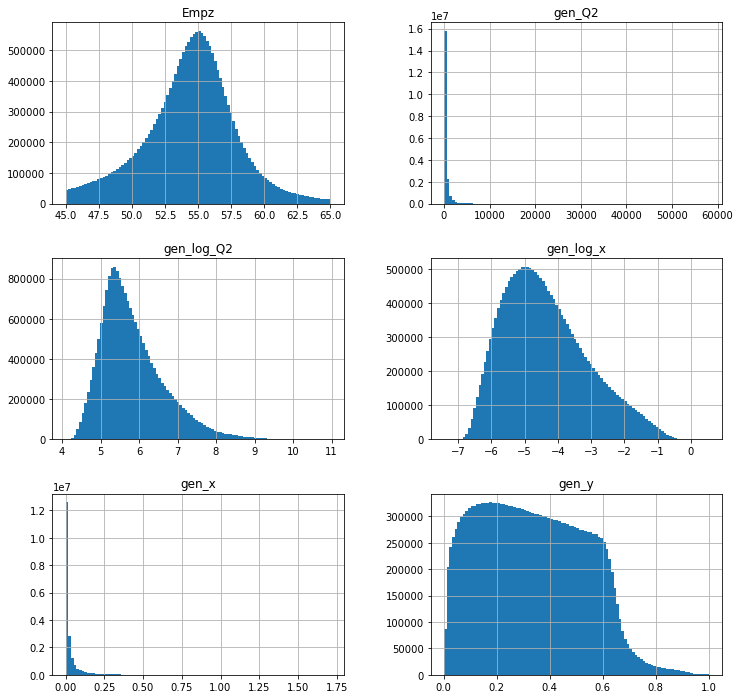

In [8]:
pandas_df.hist(figsize=(12,12), bins=100, column=['Empz','gen_y','gen_x','gen_log_x','gen_Q2','gen_log_Q2'])
plt.show()

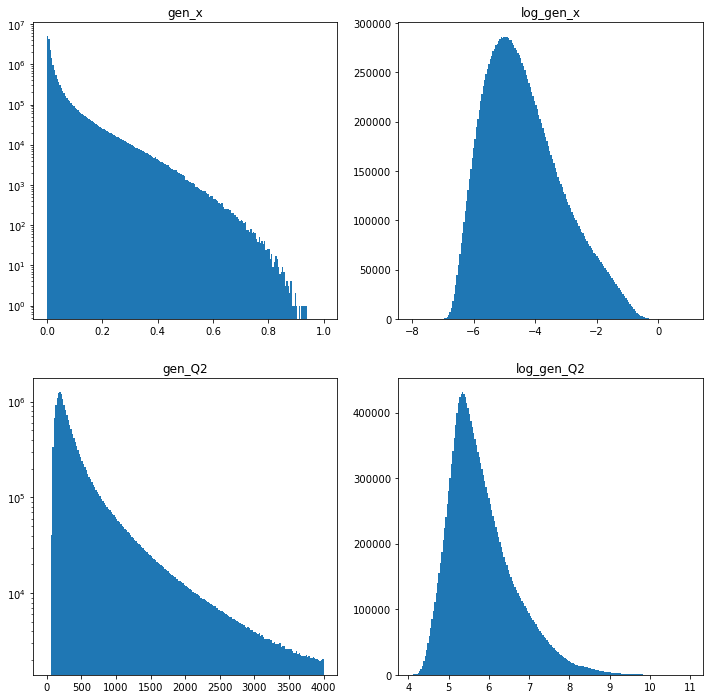

In [12]:
fig,ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].hist(pandas_df['gen_x'],bins=200, range=[0,1])
ax[0][1].hist(pandas_df['gen_log_x'],bins=200, range=[-8,1])
ax[0][0].set_yscale('log')
ax[0][0].set_title('gen_x')
ax[0][1].set_title('log_gen_x')

ax[1][0].hist(pandas_df['gen_Q2'],bins=200, range=[0,4000])
ax[1][1].hist(pandas_df['gen_log_Q2'],bins=200)
ax[1][0].set_yscale('log')
ax[1][0].set_title('gen_Q2')
ax[1][1].set_title('log_gen_Q2')

plt.show()

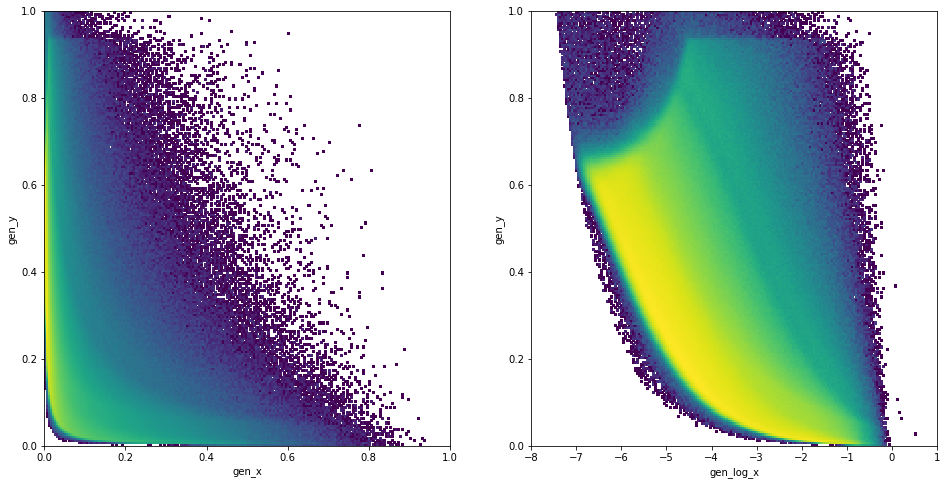

In [13]:
fig,ax = plt.subplots(1,2,figsize=(16,8))

ax[0].hist2d( pandas_df['gen_x'], pandas_df['gen_y'], bins=200, norm=mpl.colors.LogNorm(), range=([0,1],[0,1]))
ax[1].hist2d( pandas_df['gen_log_x'], pandas_df['gen_y'], bins=200, norm=mpl.colors.LogNorm(), range=([-8,1],[0,1]))

ax[0].set_xlabel('gen_x')
ax[0].set_ylabel('gen_y')



ax[1].set_xlabel('gen_log_x')
ax[1].set_ylabel('gen_y')

plt.show()


In [14]:
pandas_df

,gene_px,gene_py,gene_pz,e_px,e_py,e_pz,HFS_px,HFS_py,HFS_pz,HFS_E,...,e_Empz,gene_Empz,s,gen_x,gen_log_x,gen_log_Q2,rot_pt1,rot_pt2,rot_Empz1,rot_Empz2
entry,,,,,,,,,,,,,,,,,,,,,
9,7.991641,41.257713,-8.253663,7.896643,40.699341,-8.267031,-8.369857,-41.172997,234.253250,239.119141,...,50.541573,51.081085,101568.0,0.251793,-1.379150,7.554058,0.393705,59.024643,-32.297585,39.178993
13,16.607563,7.054676,-2.758050,17.386559,7.380891,-3.096447,-12.415076,-13.259241,243.888321,280.390930,...,22.236927,21.011444,101568.0,0.013597,-4.297904,6.751503,-0.511988,26.200180,10.087359,41.535122
20,-16.871563,29.083319,-11.572786,-16.517221,28.493423,-11.005733,3.738783,-14.740218,116.293289,119.632317,...,45.730652,47.131447,101568.0,0.107346,-2.231695,7.188428,-12.535378,34.041309,-29.975403,34.697502
21,5.742672,-13.619509,-19.351875,5.832151,-13.807648,-19.644226,-6.197764,15.308520,78.376953,82.877342,...,44.353752,43.702736,101568.0,0.038339,-3.261283,5.620198,1.079546,22.276957,-28.180584,34.545094
22,-38.008579,-59.328259,127.920113,-35.669365,-56.400394,122.574600,36.352924,56.511467,56.111095,90.331985,...,16.988434,18.121147,101568.0,0.221660,-1.506612,9.623950,0.326149,94.701012,12.185186,36.210457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71659595,3.565408,9.880897,-17.109852,3.444457,9.806575,-16.737846,-2.923073,-11.384615,52.507603,71.962334,...,36.440350,37.186985,101568.0,0.004942,-5.310020,5.098609,0.961653,15.660851,-12.010646,39.523788
71659596,-10.659201,6.177434,-22.454655,-9.979783,5.765417,-20.850082,7.264056,-1.912248,103.762489,104.141441,...,44.673645,48.066971,101568.0,0.135014,-2.002378,5.160795,-2.838266,13.461185,-31.321077,31.856997
71659599,-3.849821,-8.636397,-11.428583,-3.554196,-7.991180,-10.580326,1.953893,7.818446,33.963455,58.562283,...,24.307472,26.261688,101568.0,0.003529,-5.646618,5.236067,-0.485806,11.882806,0.206018,34.581978


## Plots of pairs of variables before and after 45 degree rotation

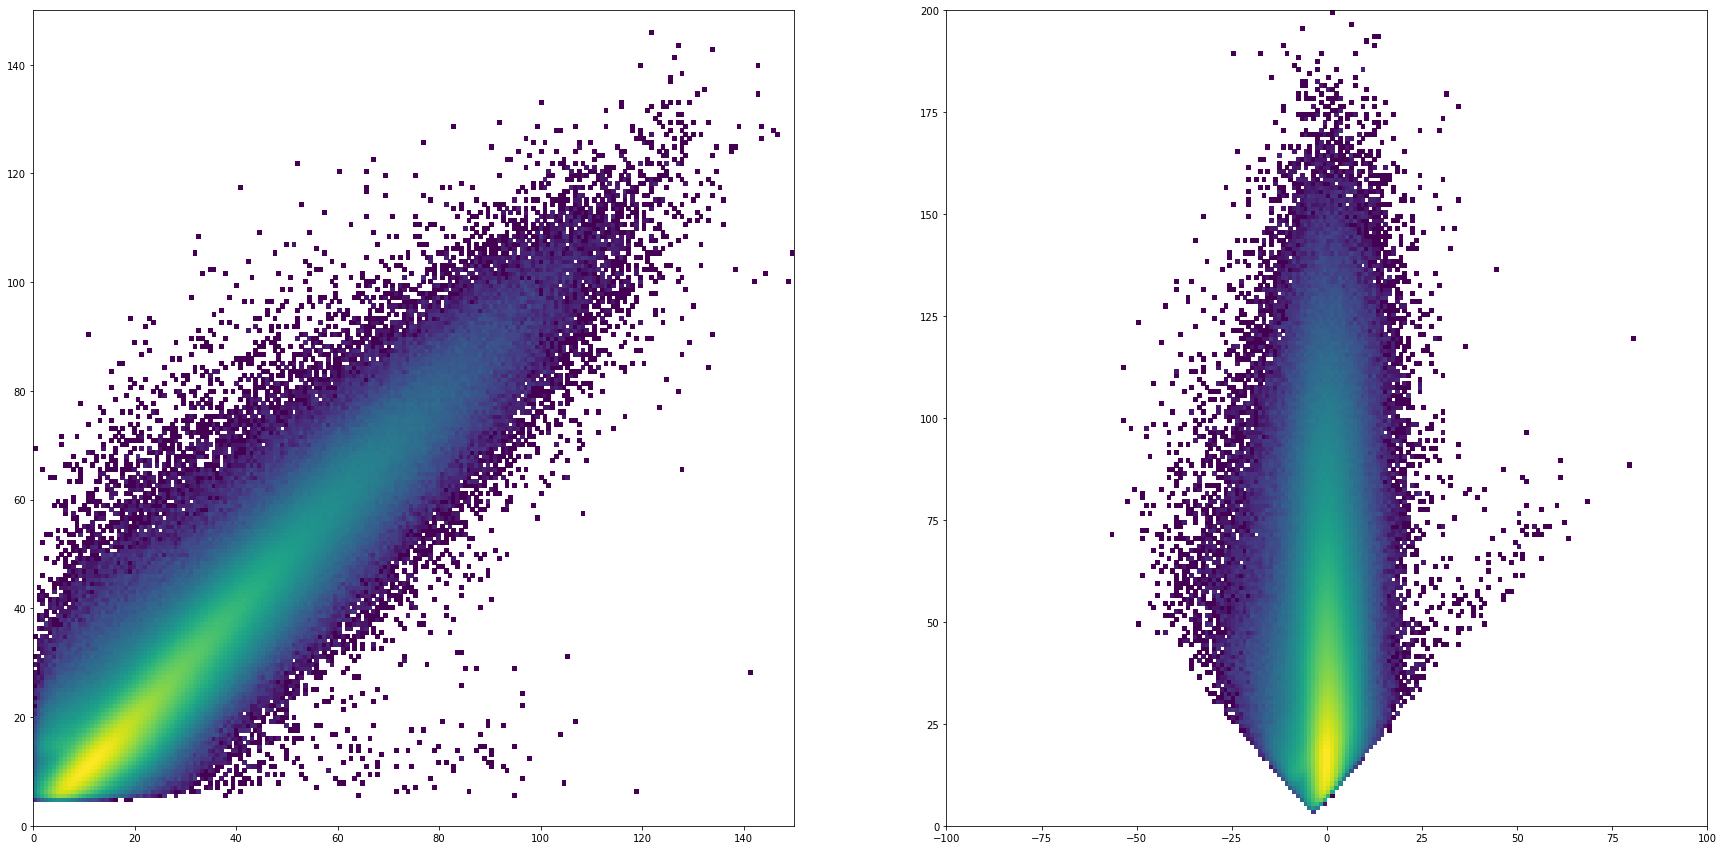

In [15]:
fig,ax = plt.subplots(1,2,figsize=(30,15))
ax[0].hist2d(pandas_df['HFS_pt'],pandas_df['e_pt'],bins=200, norm=mpl.colors.LogNorm(), range=([0,150],[0,150]))
ax[1].hist2d(pandas_df['rot_pt1'],pandas_df['rot_pt2'],bins=200, norm=mpl.colors.LogNorm(), range=([-100,100],[0,200]))
plt.show()

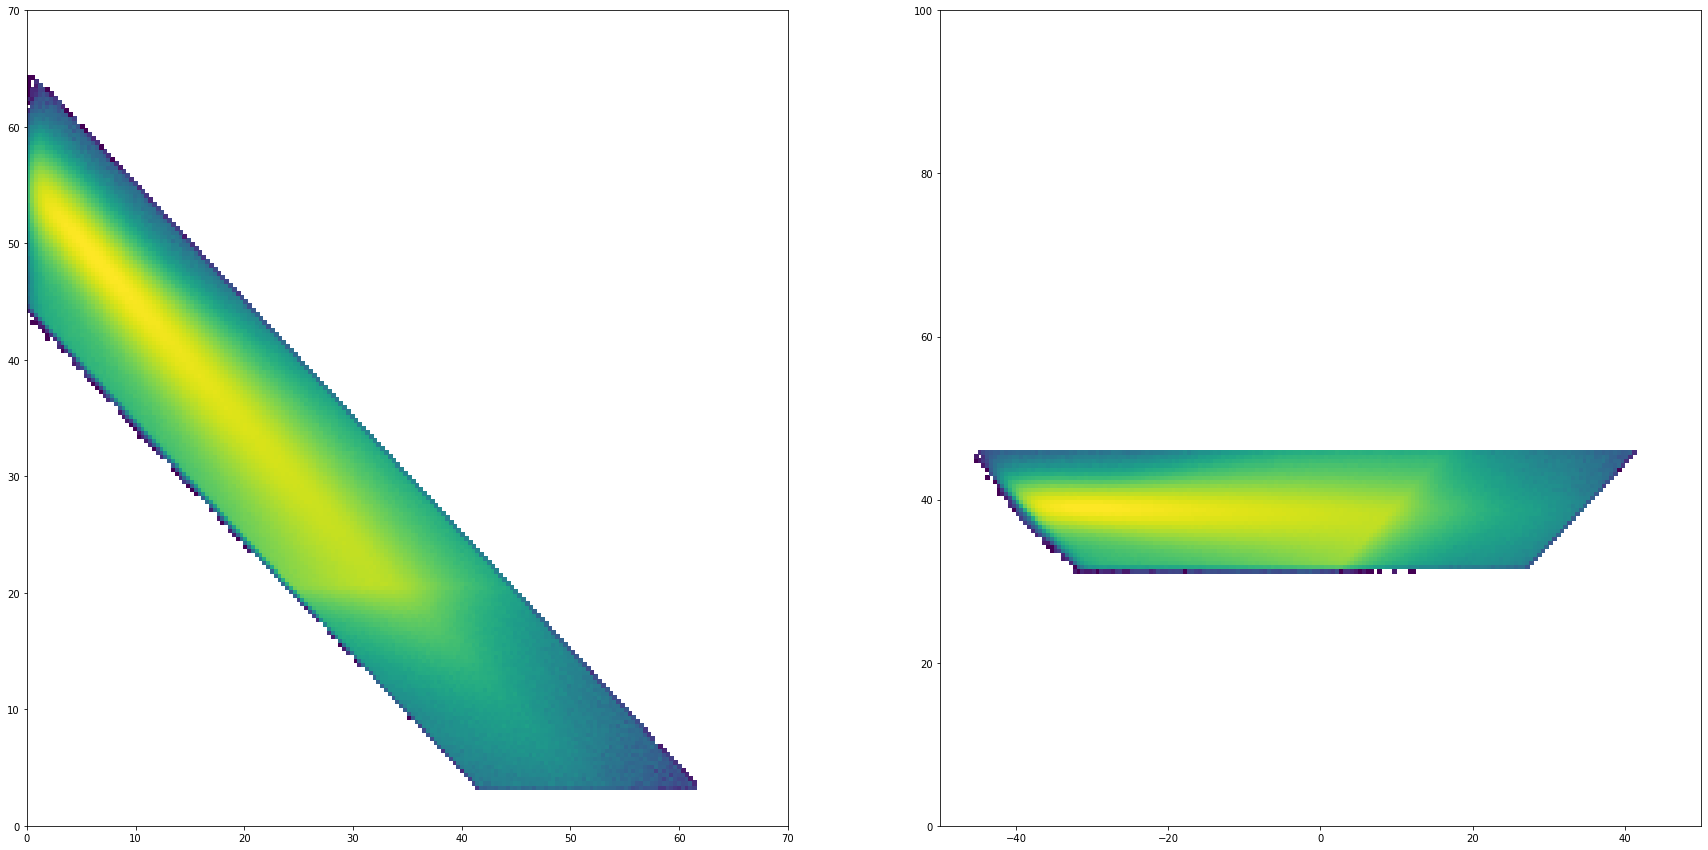

In [16]:
fig,ax = plt.subplots(1,2,figsize=(30,15))
ax[0].hist2d(pandas_df['HFS_Empz'],pandas_df['e_Empz'],bins=200, norm=mpl.colors.LogNorm(), range=([0,70],[0,70]))
ax[1].hist2d(pandas_df['rot_Empz1'],pandas_df['rot_Empz2'],bins=200, norm=mpl.colors.LogNorm(), range=([-50,50],[0,100]))
plt.show()

## Set up machine learning stuff

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#-- Ben suggested to try this.  2021-08-07
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(patience=10,
               verbose=True,
               restore_best_weights=True)

import os






## Now feed in reco electron and reco HFS

This includes a variable transformation that decorrelates pt and Empz between the HFS and the electron.

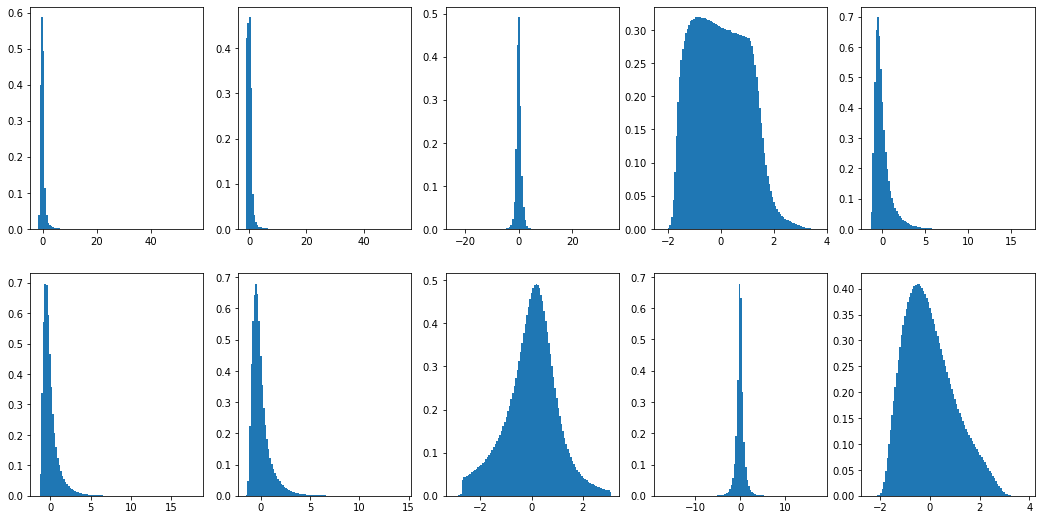

In [18]:
X3 = np.c_[ 
          pandas_df['e_pz'].to_numpy(),
          pandas_df['e_e'].to_numpy(),
          pandas_df['rot_pt1'].to_numpy(),
          pandas_df['rot_Empz1'].to_numpy(),
          pandas_df['HFS_pz'].to_numpy(),
          pandas_df['HFS_E'].to_numpy(),
          pandas_df['rot_pt2'].to_numpy(),
          pandas_df['rot_Empz2'].to_numpy(),
          pandas_df['dphi'].to_numpy(),
         ]

Y3 = np.c_[
    pandas_df['gen_log_x'].to_numpy(),
    pandas_df['gen_log_Q2'].to_numpy(),
]

scaler3 = StandardScaler()
scaler3.fit(X3)
X3 = scaler3.transform(X3)

#Y3 = Y3.reshape(-1,1)
scalerY3 = StandardScaler()
scalerY3.fit(Y3)
Y3 = scalerY3.transform(Y3)

GY3 = pandas_df['gen_y'].to_numpy()

X3_train, X3_test, Y3_train, Y3_test, GY3_train, GY3_test = train_test_split( X3, Y3, GY3, test_size=0.5)

fig,ax = plt.subplots(2,5,figsize=(18,9))
for i in range(5):
    ax[0][i].hist( X3[:,i],density=True,bins=100)
for i in range(4):
    ax[1][i].hist( X3[:,i+5],density=True,bins=100)

ax[1][4].hist( Y3[:,0],density=True,bins=100)
plt.show()

In [19]:
model3 = tf.keras.models.load_model( 'model_output_h1_train_2d_v1a' )

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              5

In [20]:
%%time

mypreds3 = model3.predict(X3_test,batch_size=1000)

CPU times: user 7.33 s, sys: 918 ms, total: 8.24 s
Wall time: 5.95 s


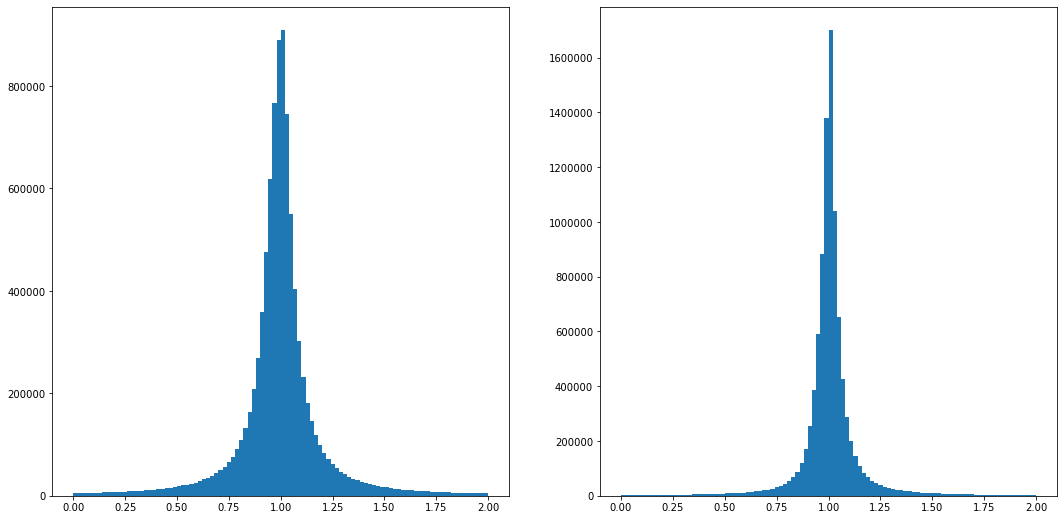

In [21]:
fig,ax = plt.subplots(1,2,figsize=(18,9))
ax[0].hist(mypreds3[:,0]/Y3_test[:,0],bins=100, range=[0,2] )
ax[1].hist(mypreds3[:,1]/Y3_test[:,1],bins=100, range=[0,2] )
plt.show()

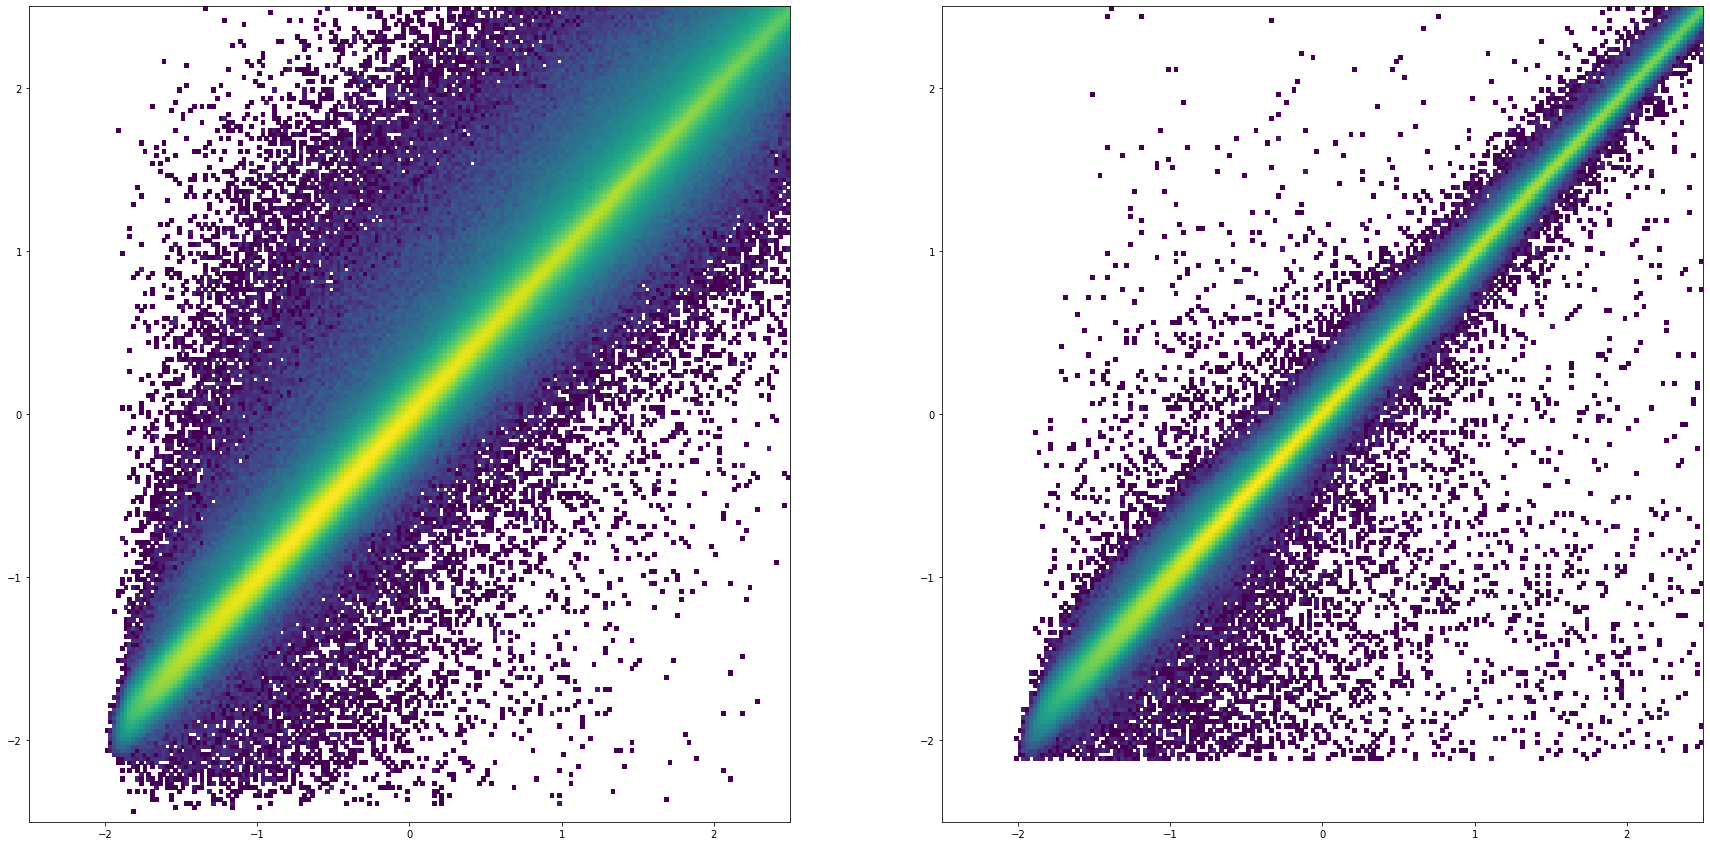

In [22]:
fig,ax = plt.subplots(1,2,figsize=(30,15))
ax[0].hist2d(mypreds3[:,0],Y3_test[:,0],bins=200, norm=mpl.colors.LogNorm(), range=([-2.5,2.5],[-2.5,2.5]))
ax[1].hist2d(mypreds3[:,1],Y3_test[:,1],bins=200, norm=mpl.colors.LogNorm(), range=([-2.5,2.5],[-2.5,2.5]))
plt.show()

In [23]:
inv_trans_Y = scalerY3.inverse_transform(Y3_test)
inv_trans_pred = scalerY3.inverse_transform(mypreds3)
true_vals = np.exp( inv_trans_Y )
pred_vals = np.exp( inv_trans_pred )

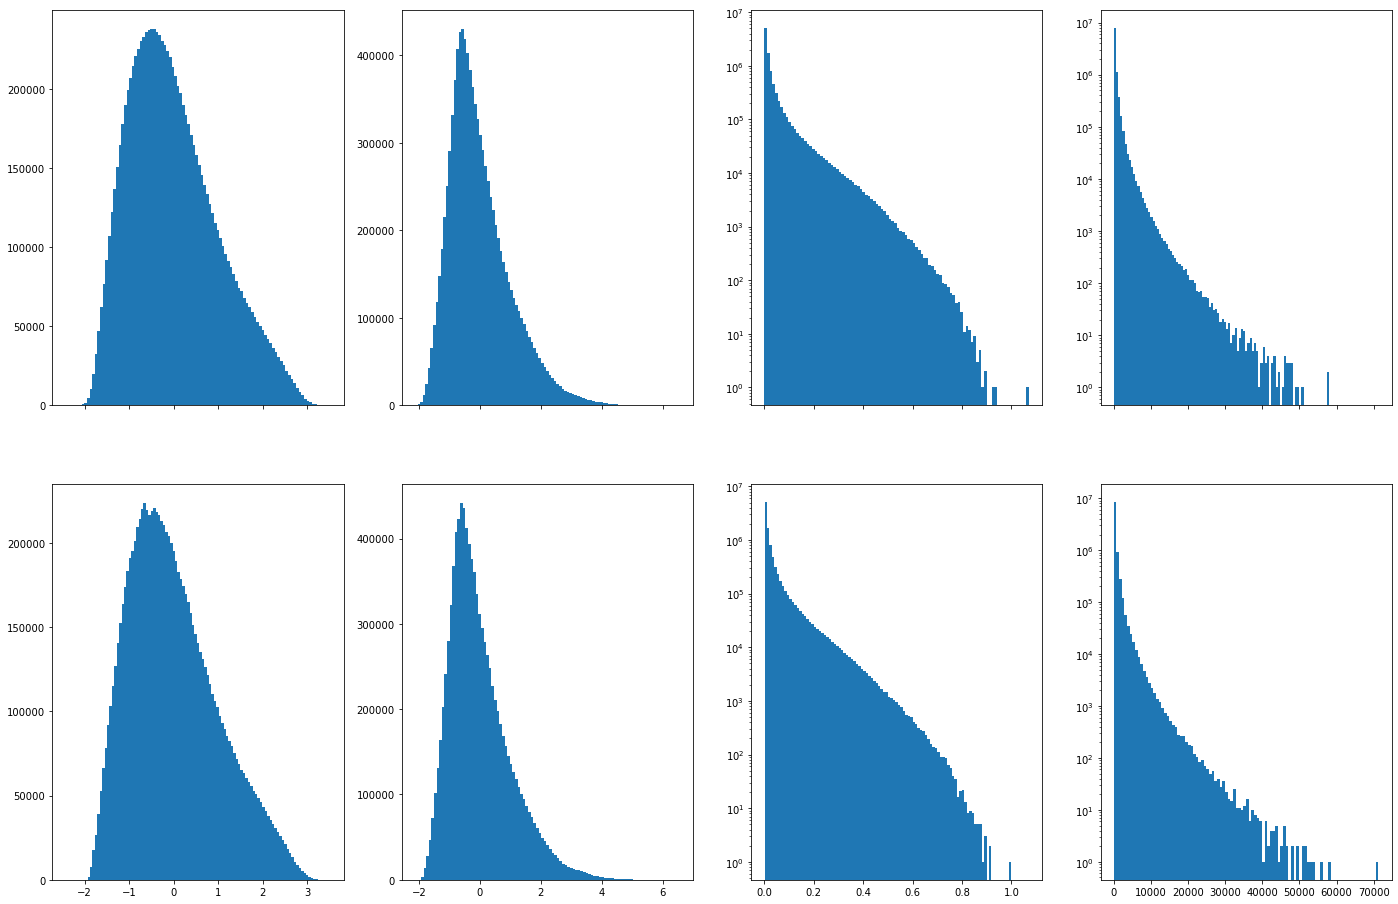

In [24]:
fig,ax = plt.subplots(2,4,figsize=(24,16), sharex='col')

ax[0][0].hist(Y3_test[:,0], bins=100)
ax[0][1].hist(Y3_test[:,1], bins=100)
ax[0][2].hist(true_vals[:,0], bins=100)
ax[0][3].hist(true_vals[:,1], bins=100)

ax[1][0].hist(mypreds3[:,0], bins=100)
ax[1][1].hist(mypreds3[:,1], bins=100)
ax[1][2].hist(pred_vals[:,0], bins=100)
ax[1][3].hist(pred_vals[:,1], bins=100)


ax[0][2].set_yscale('log')
ax[0][3].set_yscale('log')

ax[1][2].set_yscale('log')
ax[1][3].set_yscale('log')

plt.show()

## Plots of pred/true of training target variable : transformed log(x) and transformed log(Q2)

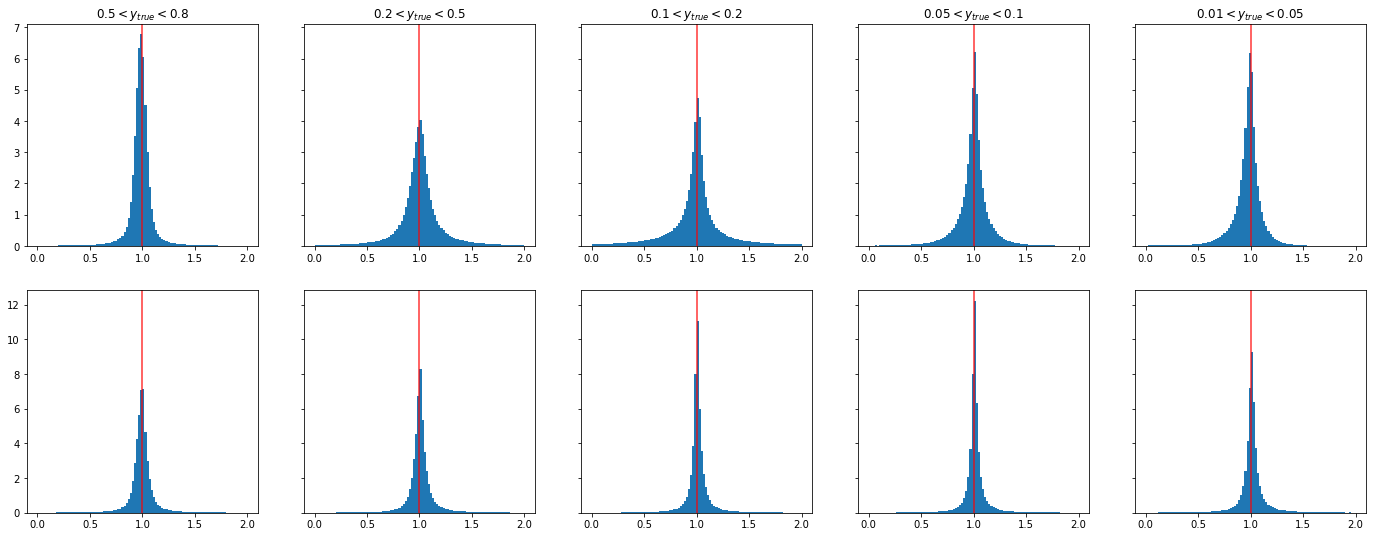

In [25]:
fig,ax = plt.subplots(2,5,figsize=(24,9),sharey='row')

ax[0][0].hist(mypreds3[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)]/Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,0],density=True,bins=100,range=(0,2))
ax[0][1].hist(mypreds3[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)]/Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,0],density=True,bins=100,range=(0,2))
ax[0][2].hist(mypreds3[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)]/Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,0],density=True,bins=100,range=(0,2))
ax[0][3].hist(mypreds3[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)]/Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,0],density=True,bins=100,range=(0,2))
ax[0][4].hist(mypreds3[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)]/Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,0],density=True,bins=100,range=(0,2))

ax[1][0].hist(mypreds3[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)]/Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,1],density=True,bins=100,range=(0,2))
ax[1][1].hist(mypreds3[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)]/Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,1],density=True,bins=100,range=(0,2))
ax[1][2].hist(mypreds3[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)]/Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,1],density=True,bins=100,range=(0,2))
ax[1][3].hist(mypreds3[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)]/Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,1],density=True,bins=100,range=(0,2))
ax[1][4].hist(mypreds3[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)]/Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,1],density=True,bins=100,range=(0,2))



ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')


for i in range(5):
    ax[0][i].axvline(1.0,color='red',lw=2,alpha=0.6)
    ax[1][i].axvline(1.0,color='red',lw=2,alpha=0.6)
    
plt.show()




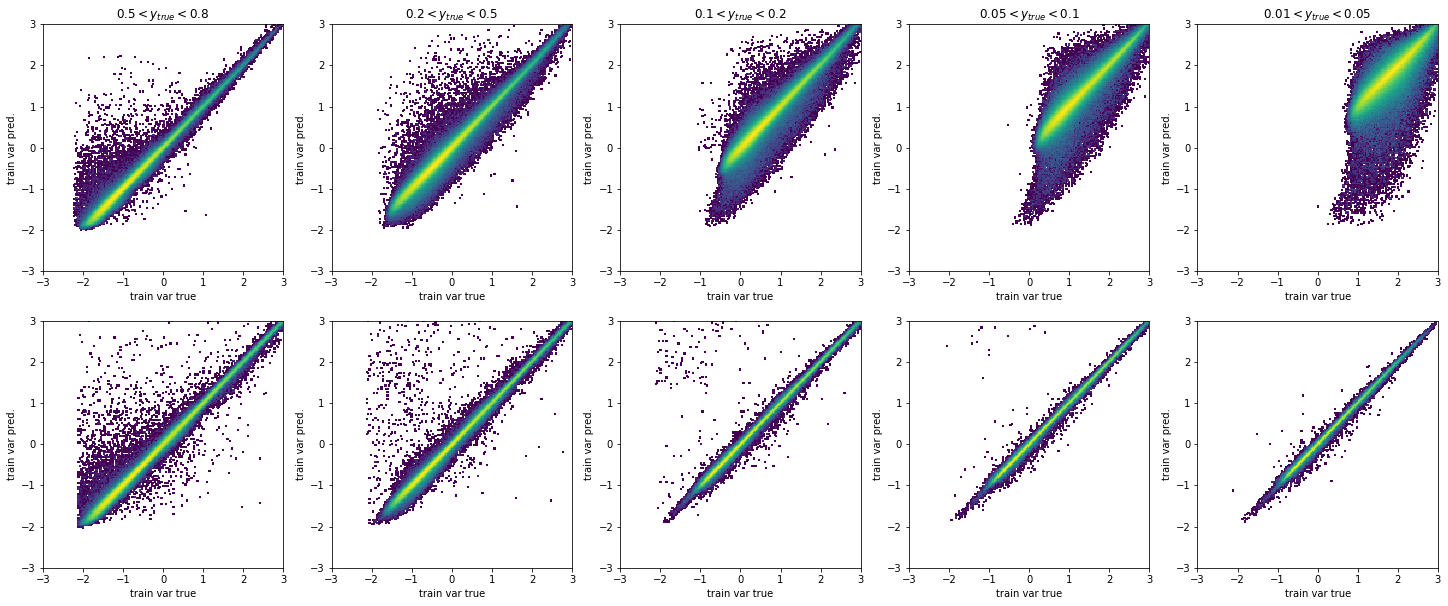

In [26]:
fig,ax = plt.subplots(2,5,figsize=(25,10))



ax[0][0].hist2d( Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,0],
              mypreds3[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][1].hist2d( Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,0],
              mypreds3[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][2].hist2d( Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,0],
              mypreds3[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][3].hist2d( Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,0],
              mypreds3[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[0][4].hist2d( Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,0],
              mypreds3[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())



ax[1][0].hist2d( Y3_test[(GY3_test > 0.5)*(GY3_test < 0.8)][:,1],
              mypreds3[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][1].hist2d( Y3_test[(GY3_test > 0.2)*(GY3_test < 0.5)][:,1],
              mypreds3[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][2].hist2d( Y3_test[(GY3_test > 0.1)*(GY3_test < 0.2)][:,1],
              mypreds3[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][3].hist2d( Y3_test[(GY3_test > 0.05)*(GY3_test < 0.1)][:,1],
              mypreds3[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())

ax[1][4].hist2d( Y3_test[(GY3_test > 0.01)*(GY3_test < 0.05)][:,1],
              mypreds3[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([-3,3],[-3,3]), norm=mpl.colors.LogNorm())





ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')




for i in range(5):
    ax[0][i].set_ylabel('train var pred.')
    ax[0][i].set_xlabel('train var true')
    ax[1][i].set_ylabel('train var pred.')
    ax[1][i].set_xlabel('train var true')




    
plt.show()

## Plots of predicted and true physics variable : x

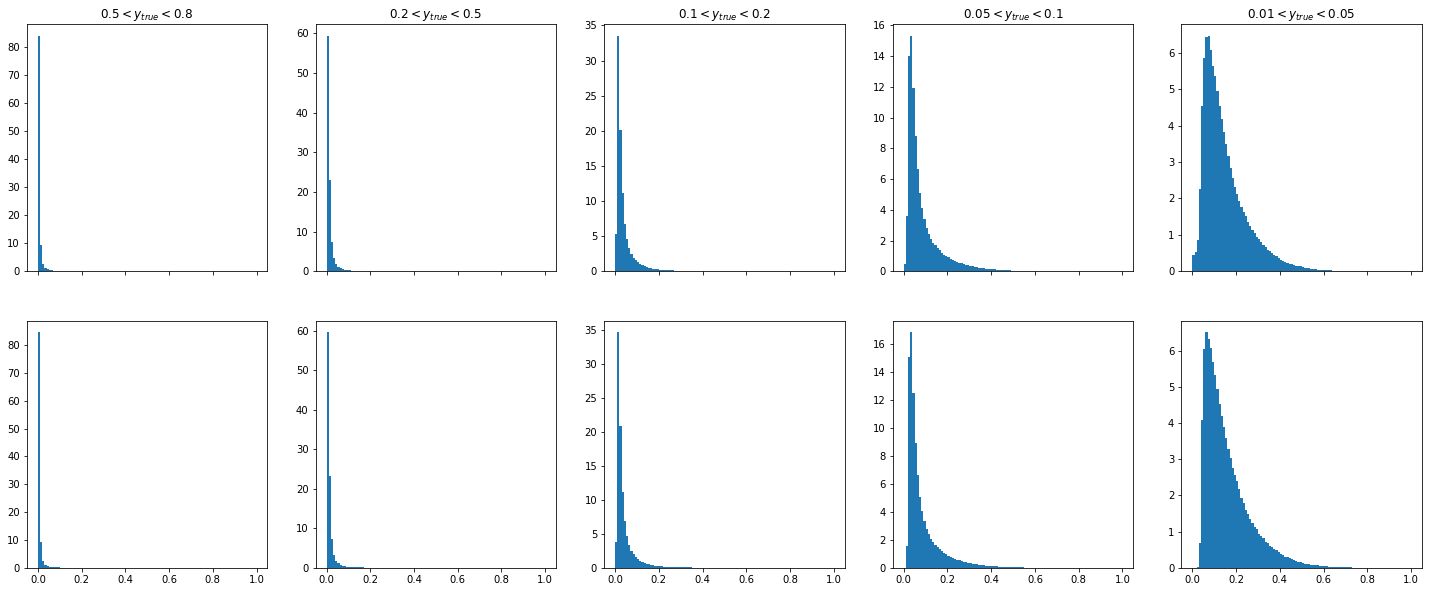

In [27]:
fig,ax = plt.subplots(2,5,figsize=(25,10),sharex='col')

ax[0][0].hist(pred_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,1))
ax[0][1].hist(pred_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,1))
ax[0][2].hist(pred_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,1))
ax[0][3].hist(pred_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,1))
ax[0][4].hist(pred_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,1))

ax[1][0].hist(true_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,1))
ax[1][1].hist(true_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,1))
ax[1][2].hist(true_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,1))
ax[1][3].hist(true_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,1))
ax[1][4].hist(true_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,1))


ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')


    
plt.show()

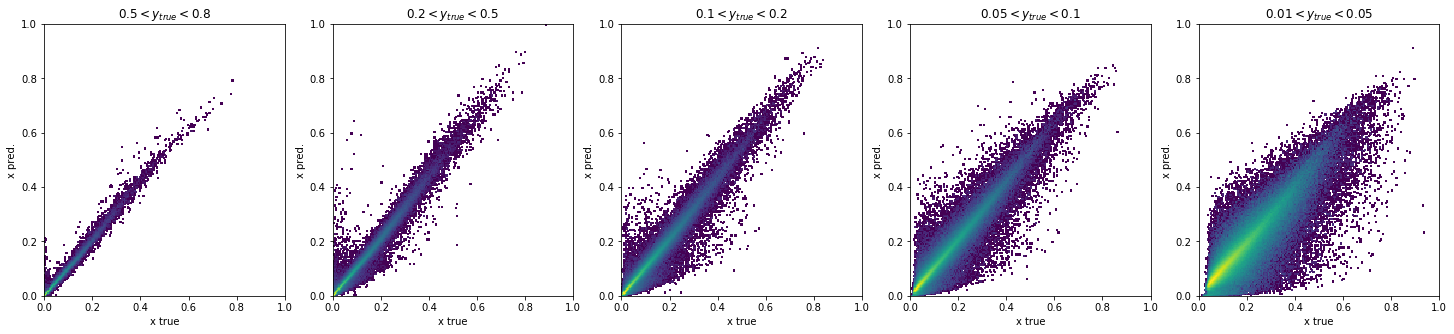

In [28]:
fig,ax = plt.subplots(1,5,figsize=(25,5))

ax[0].hist2d( true_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],
              pred_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())

ax[1].hist2d( true_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],
              pred_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())


ax[2].hist2d( true_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],
              pred_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())


ax[3].hist2d( true_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],
              pred_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())


ax[4].hist2d( true_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],
              pred_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([0,1],[0,1]), norm=mpl.colors.LogNorm())








ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')

for i in range(5):
    ax[i].set_ylabel('x pred.')
    ax[i].set_xlabel('x true')


    
plt.show()

## Plots of predicted and true physics variable : Q2

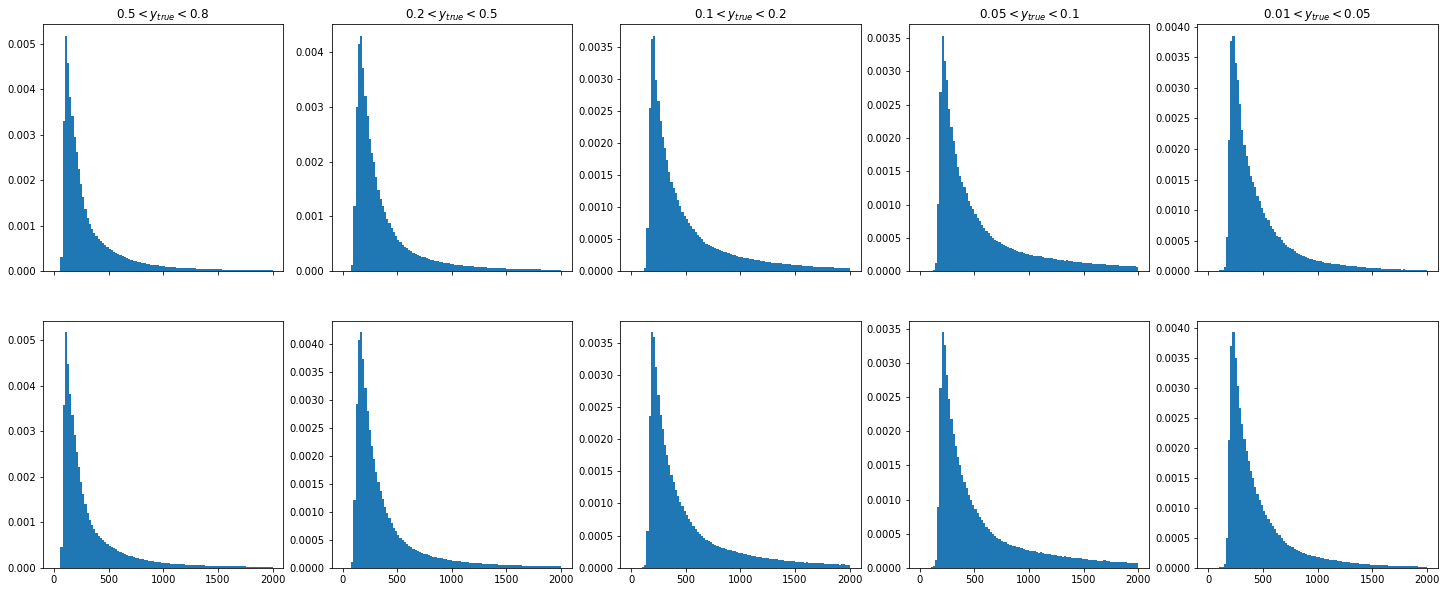

In [29]:
fig,ax = plt.subplots(2,5,figsize=(25,10),sharex='col')

xmax = 2000

ax[0][0].hist(pred_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,xmax))
ax[0][1].hist(pred_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,xmax))
ax[0][2].hist(pred_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,xmax))
ax[0][3].hist(pred_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,xmax))
ax[0][4].hist(pred_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,xmax))

ax[1][0].hist(true_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(0,xmax))
ax[1][1].hist(true_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(0,xmax))
ax[1][2].hist(true_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(0,xmax))
ax[1][3].hist(true_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(0,xmax))
ax[1][4].hist(true_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(0,xmax))


ax[0][0].set_title('$0.5<y_{true}<0.8$')
ax[0][1].set_title('$0.2<y_{true}<0.5$')
ax[0][2].set_title('$0.1<y_{true}<0.2$')
ax[0][3].set_title('$0.05<y_{true}<0.1$')
ax[0][4].set_title('$0.01<y_{true}<0.05$')


    
plt.show()

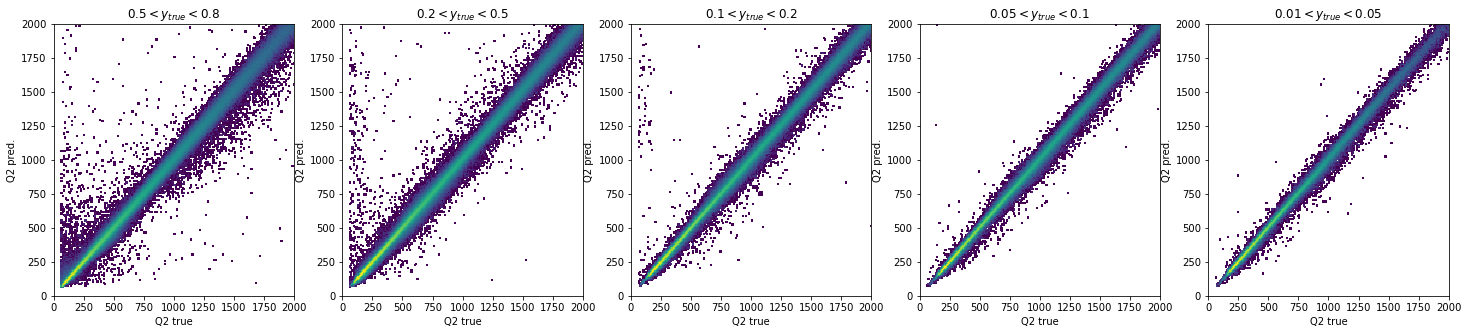

In [30]:
fig,ax = plt.subplots(1,5,figsize=(25,5))

axis_max = 2000

ax[0].hist2d( true_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],
              pred_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())

ax[1].hist2d( true_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],
              pred_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())


ax[2].hist2d( true_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],
              pred_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())


ax[3].hist2d( true_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],
              pred_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())


ax[4].hist2d( true_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],
              pred_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],                
              density=True,bins=200,range=([0,axis_max],[0,axis_max]), norm=mpl.colors.LogNorm())








ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')

for i in range(5):
    ax[i].set_ylabel('Q2 pred.')
    ax[i].set_xlabel('Q2 true')


    
plt.show()

## Plots of pred/true of physics variable:  x

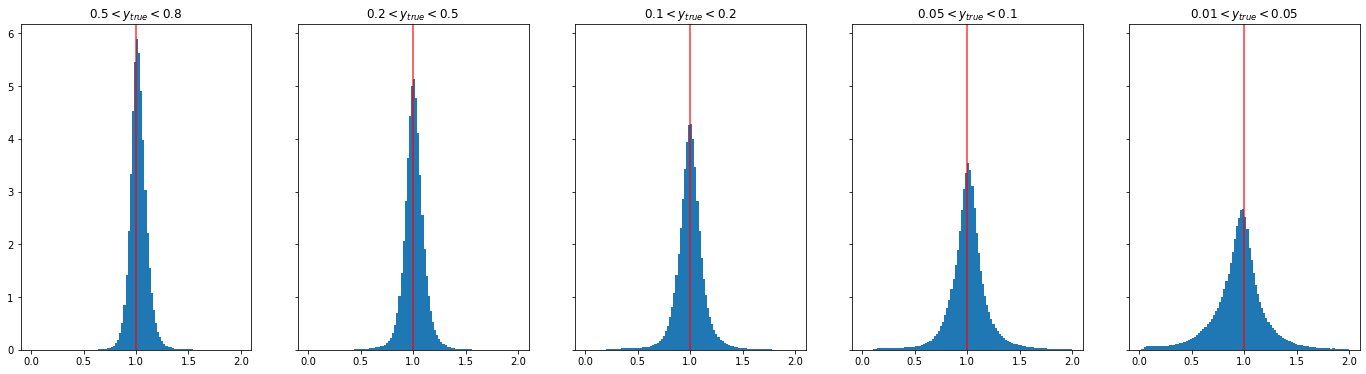

In [31]:
fig,ax = plt.subplots(1,5,figsize=(24,6),sharey='row')

ax[0].hist(pred_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)]/true_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)], density=True,bins=100,range=(0,2))
ax[1].hist(pred_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)]/true_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)], density=True,bins=100,range=(0,2))
ax[2].hist(pred_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)]/true_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)], density=True,bins=100,range=(0,2))
ax[3].hist(pred_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)]/true_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)], density=True,bins=100,range=(0,2))
ax[4].hist(pred_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)]/true_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)], density=True,bins=100,range=(0,2))






ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')


for i in range(5):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
    
plt.show()

## Plots of pred/true of physics variable: Q2

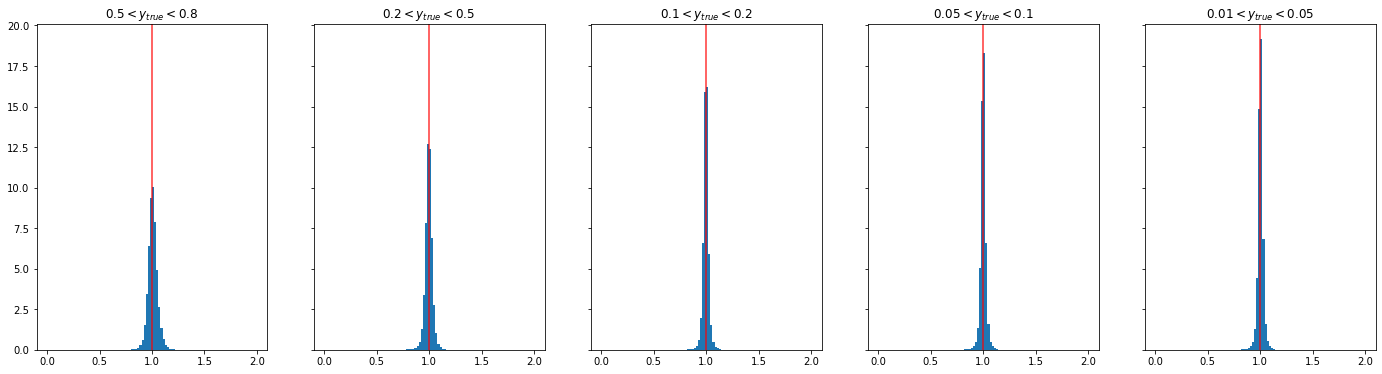

In [32]:
fig,ax = plt.subplots(1,5,figsize=(24,6),sharey='row')

ax[0].hist(pred_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)]/true_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)], density=True,bins=100,range=(0,2))
ax[1].hist(pred_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)]/true_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)], density=True,bins=100,range=(0,2))
ax[2].hist(pred_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)]/true_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)], density=True,bins=100,range=(0,2))
ax[3].hist(pred_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)]/true_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)], density=True,bins=100,range=(0,2))
ax[4].hist(pred_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)]/true_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)], density=True,bins=100,range=(0,2))






ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')


for i in range(5):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
    
plt.show()

## Standard comparison plots

In [33]:
%%time

pandas_df.eval('s = 4*27.6*920', inplace=True)
pandas_df.eval('x_e = Q2_e/(s*y_e)',inplace=True)
pandas_df.eval('x_da = Q2_da/(s*y_da)',inplace=True)
pandas_df.eval('x_sigma = Q2_sigma/(s*y_sigma)',inplace=True)
pandas_df.eval('x_esigma = x_sigma',inplace=True)
pandas_df.eval('x_h = Q2_h/(s*y_h)',inplace=True)



pandas_df.eval('gen_x= gen_Q2/(s*gen_y)', inplace=True)   

pandas_df.eval('xe_ratio = x_e/gen_x',inplace=True)
pandas_df.eval('xda_ratio = x_da/gen_x',inplace=True)
pandas_df.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
pandas_df.eval('xesigma_ratio = x_esigma/gen_x',inplace=True)
pandas_df.eval('xh_ratio = x_h/gen_x',inplace=True)
        

CPU times: user 1.03 s, sys: 4.87 s, total: 5.91 s
Wall time: 3.61 s


['gen_y>0.5 and gen_y<0.8' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.8
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


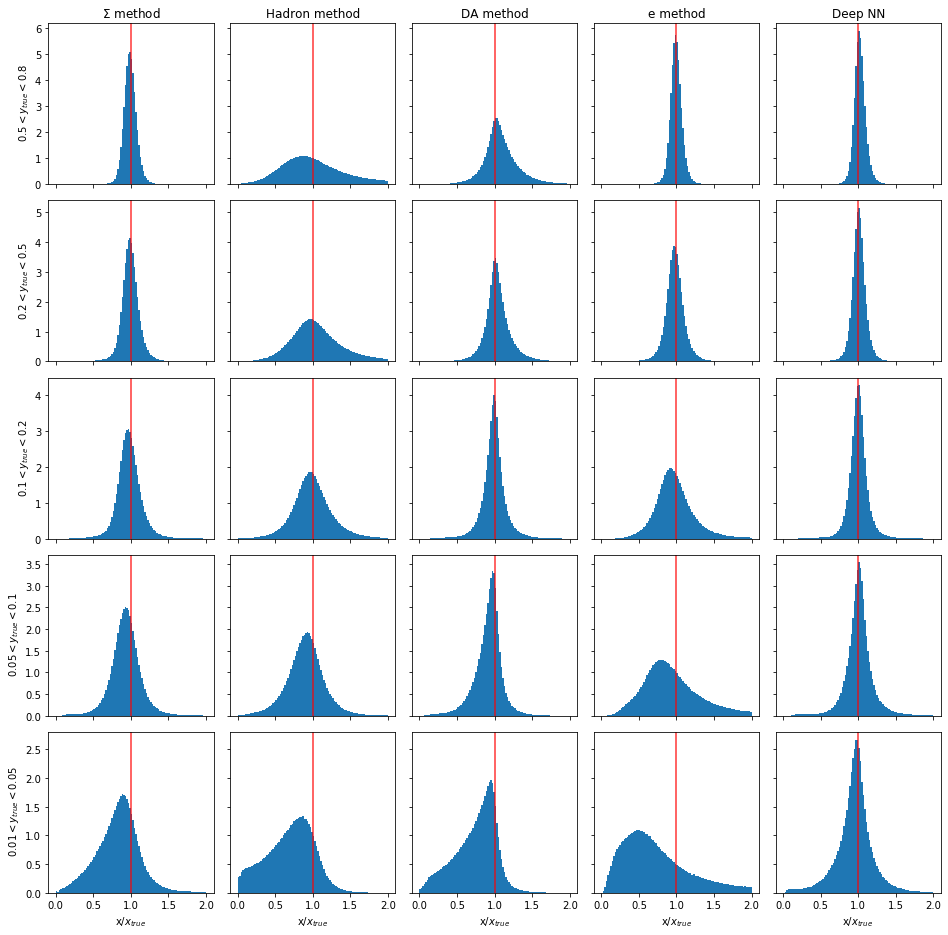

CPU times: user 14.4 s, sys: 6.15 s, total: 20.6 s
Wall time: 19.1 s


In [34]:
%%time

fig,ax = plt.subplots(5,5,figsize=(16,16),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.8', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

xmin=0.
xmax=2.

for i in range(5):
    print(ybins[i])
    ax[0 + 5*i].hist(pandas_df.query(ybins[i])['xsigma_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[1 + 5*i].hist(pandas_df.query(ybins[i])['xh_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[2 + 5*i].hist(pandas_df.query(ybins[i])['xda_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[3 + 5*i].hist(pandas_df.query(ybins[i])['xe_ratio'],density=True,bins=100,range=(xmin,xmax))

ax[4].hist(pred_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)]/true_vals[:,0][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(xmin,xmax))
ax[9].hist(pred_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)]/true_vals[:,0][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(xmin,xmax))
ax[14].hist(pred_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)]/true_vals[:,0][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(xmin,xmax))
ax[19].hist(pred_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)]/true_vals[:,0][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(xmin,xmax))
ax[24].hist(pred_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)]/true_vals[:,0][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(xmin,xmax))
    
for i in range(len(ax.flatten())):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
#ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
    ax[i].set_xticks([],minor=True)
    ax[i].set_yticks([], minor=True)
    #ax[i].set_yscale('log')
    # for minor ticks
    #ax[i].set_xticks([], minor=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[3].set_title('e method')
ax[2].set_title('DA method')
ax[0].set_title('$\Sigma$ method')
ax[1].set_title('Hadron method')
ax[4].set_title('Deep NN')


ax[0].set_ylabel(' $0.5<y_{true}<0.8$')
ax[4+1].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8+1+1].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12+1+1+1].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16+1+1+1+1].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'x/$x_{true}$ ')
ax[-2].set_xlabel(r'x/$x_{true}$ ')
ax[-3].set_xlabel(r'x/$x_{true}$ ')
ax[-4].set_xlabel(r'x/$x_{true}$ ')
ax[-5].set_xlabel(r'x/$x_{true}$ ')


plt.show()

In [35]:
pandas_df.eval('Q2e_ratio = Q2_e/gen_Q2',inplace=True)
pandas_df.eval('Q2da_ratio = Q2_da/gen_Q2',inplace=True)
pandas_df.eval('Q2sigma_ratio = Q2_sigma/gen_Q2',inplace=True)
pandas_df.eval('Q2h_ratio = Q2_h/gen_Q2',inplace=True)

['gen_y>0.5 and gen_y<0.8' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.8
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


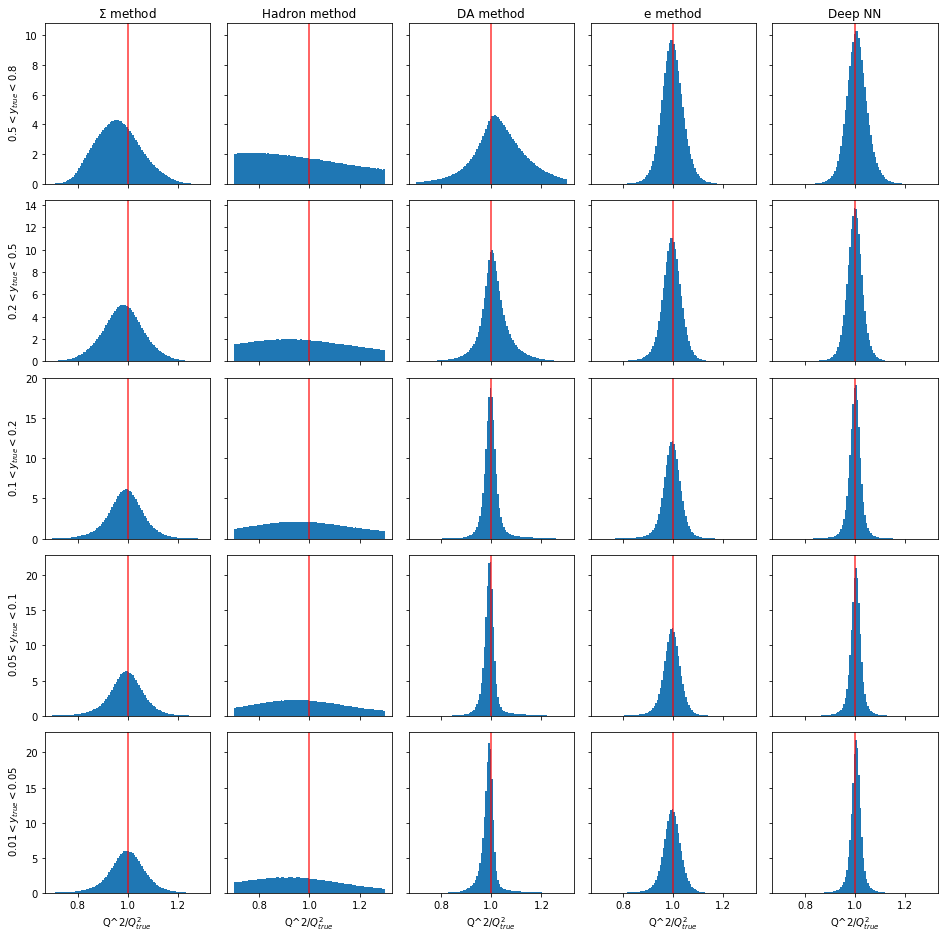

CPU times: user 14.3 s, sys: 2.21 s, total: 16.5 s
Wall time: 15.1 s


In [37]:
%%time

fig,ax = plt.subplots(5,5,figsize=(16,16),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.8', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

xmin=0.7
xmax=1.3

for i in range(5):
    print(ybins[i])
    ax[0 + 5*i].hist(pandas_df.query(ybins[i])['Q2sigma_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[1 + 5*i].hist(pandas_df.query(ybins[i])['Q2h_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[2 + 5*i].hist(pandas_df.query(ybins[i])['Q2da_ratio'],density=True,bins=100,range=(xmin,xmax))
    ax[3 + 5*i].hist(pandas_df.query(ybins[i])['Q2e_ratio'],density=True,bins=100,range=(xmin,xmax))

ax[4].hist(pred_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)]/true_vals[:,1][(GY3_test > 0.5)*(GY3_test < 0.8)],density=True,bins=100,range=(xmin,xmax))
ax[9].hist(pred_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)]/true_vals[:,1][(GY3_test > 0.2)*(GY3_test < 0.5)],density=True,bins=100,range=(xmin,xmax))
ax[14].hist(pred_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)]/true_vals[:,1][(GY3_test > 0.1)*(GY3_test < 0.2)],density=True,bins=100,range=(xmin,xmax))
ax[19].hist(pred_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)]/true_vals[:,1][(GY3_test > 0.05)*(GY3_test < 0.1)],density=True,bins=100,range=(xmin,xmax))
ax[24].hist(pred_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)]/true_vals[:,1][(GY3_test > 0.01)*(GY3_test < 0.05)],density=True,bins=100,range=(xmin,xmax))
    
for i in range(len(ax.flatten())):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
#ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
    ax[i].set_xticks([],minor=True)
    ax[i].set_yticks([], minor=True)
    #ax[i].set_yscale('log')
    # for minor ticks
    #ax[i].set_xticks([], minor=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[3].set_title('e method')
ax[2].set_title('DA method')
ax[0].set_title('$\Sigma$ method')
ax[1].set_title('Hadron method')
ax[4].set_title('Deep NN')


ax[0].set_ylabel(' $0.5<y_{true}<0.8$')
ax[4+1].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8+1+1].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12+1+1+1].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16+1+1+1+1].set_ylabel(' $0.01<y_{true}<0.05$')

ax[-1].set_xlabel(r'Q^2/$Q^2_{true}$ ')
ax[-2].set_xlabel(r'Q^2/$Q^2_{true}$ ')
ax[-3].set_xlabel(r'Q^2/$Q^2_{true}$ ')
ax[-4].set_xlabel(r'Q^2/$Q^2_{true}$ ')
ax[-5].set_xlabel(r'Q^2/$Q^2_{true}$ ')


plt.show()